<a href="https://colab.research.google.com/github/dhinoja-rajan/Sales_Prediction_using_ML/blob/main/notebook_files/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Sales_Prediction_using_ML (Regression Project)**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print(" ✅ Required Libraries are Imported - Done!...")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 ✅ Required Libraries are Imported - Done!...


## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [ ]:
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/Big_Mart_Sales/train_set.csv'))
# dataset = pd.read_csv('../datasets/sales_data.csv')
dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


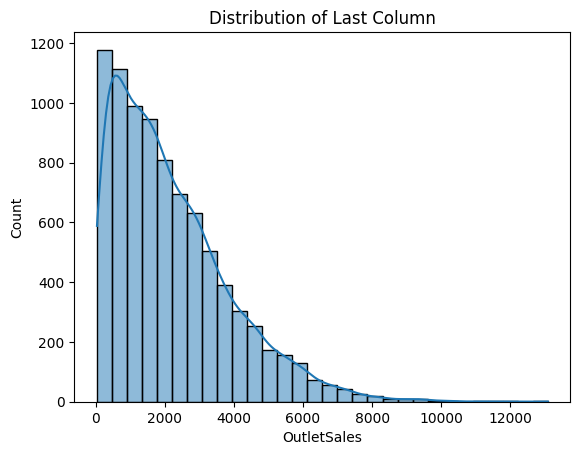

In [ ]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

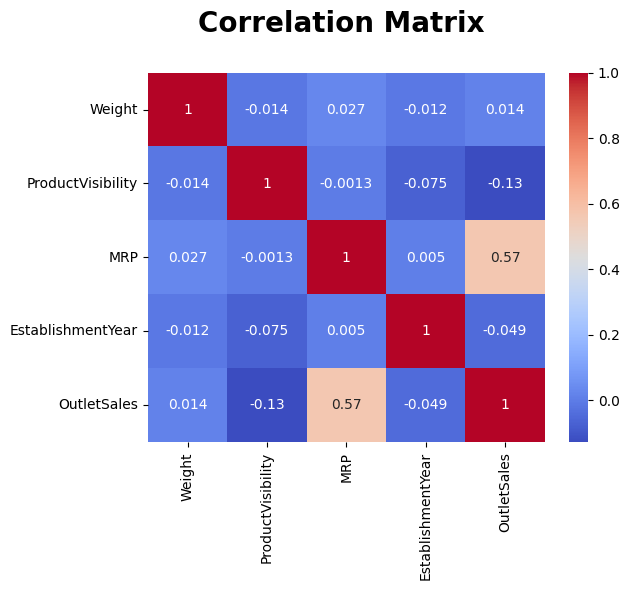

In [ ]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[dataset.select_dtypes(exclude=['object']).columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

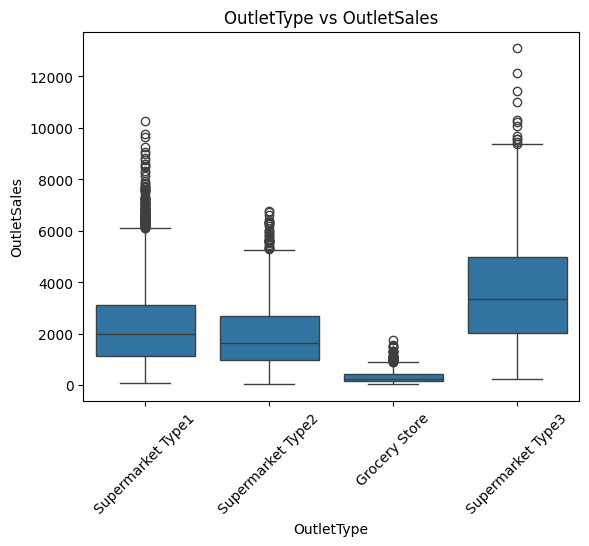

In [ ]:
# Boxplot for OutletType vs OutletSales
# plt.figure(figsize=(10, 6))
sns.boxplot(x='OutletType', y='OutletSales', data=dataset)
plt.xticks(rotation=45)
plt.title('OutletType vs OutletSales')
plt.show()

In [ ]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe())

> Shape of the Dataset:  (8523, 12) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

> Statistical summary of the Dataset:
        Weight  ProductVisibility      MRP  E

In [ ]:
for col in dataset.columns:
    value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

    print(f"Column: \t\t'{col}'")
    print(value_counts_dataset.T.to_string(header=False), "\n")

Column: 		'ProductID'
Unique Values:   FDW13  FDG33  FDX31  FDT07  NCY18  FDW26  NCQ06  DRN47  FDV38  FDX20  DRE49  NCI54  FDU12  FDG09  FDP25  FDF52  FDO19  FDF56  FDV60  NCF42  NCJ30  FDX04  FDQ40  FDW49  FDD38  NCB18  NCL31  DRA59  FDR52  FDC14  FDF04  FDA15  FDO10  FDA13  FDF22  FDT49  FDN56  FDW24  FDV26  NCO54  DRK35  FDA44  FDA50  FDR48  FDR43  FDE11  FDQ39  FDT40  NCI29  FDJ58  FDD29  DRF03  FDT55  FDR59  NCQ43  FDX58  FDX50  NCB31  FDS52  FDO32  FDY47  DRF23  FDD05  FDH10  FDW48  FDS55  FDZ33  FDB17  FDT24  NCM07  DRP35  NCK53  DRI03  FDL34  DRF01  FDH27  FDR04  FDS33  FDY49  FDV09  FDU23  FDU13  DRD25  FDT32  FDK20  NCQ05  NCL53  NCC18  FDZ26  FDG24  NCK05  NCE54  FDZ20  FDG38  NCE31  FDL20  FDJ55  DRJ24  FDI41  FDY03  DRK12  FDO37  NCX05  FDY55  FDT21  FDX21  FDY56  FDF05  FDI22  DRF27  FDH28  FDR23  FDA04  FDR44  FDO52  NCV06  NCV41  NCS53  FDZ21  FDA39  FDP28  NCK29  FDF16  FDX45  FDJ44  FDL10  FDL58  FDK58  NCY29  FDU19  FDR46  FDG57  FDP11  FDH33  NCP05  FDV20  NCX29  FD

In [ ]:
# # Handling ProductID Column
dataset['ProductID'] = dataset['ProductID'].apply(lambda x: x[:2])
# dataset['ProductID'] = dataset['ProductID'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
print("> After Handling the Prefixes of 'ProductID' Column and changed to new Name: {'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'}...")
print(dataset['ProductID'].value_counts())

print("\n")

# Handling FatContent Column
dataset['FatContent'] = dataset['FatContent'].replace({ 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Low fat': 'Low Fat', 'reg': 'Regular'})
# dataset.loc[dataset['ProductID'] == 'NC', 'FatContent'] = 'Non-Edible'
print("> After Handling the Aliases of 'FatContent' Column: Low Fat and Regular & Adding a new Category: Non-Edible...")
print(dataset['FatContent'].value_counts())

print("\n")

# Handling EstablishmentYear Column
import datetime as dt
current_year = dt.datetime.today().year
dataset['OutletAge'] = current_year - dataset['EstablishmentYear']
# dataset = dataset.drop('EstablishmentYear', axis=1)
print("> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...")
print(dataset['OutletAge'].value_counts())

dataset.drop(columns=['EstablishmentYear', 'ProductID', 'OutletID'], inplace=True)

> After Handling the Prefixes of 'ProductID' Column and changed to new Name: {'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'}...
ProductID
FD    6125
NC    1599
DR     799
Name: count, dtype: int64


> After Handling the Aliases of 'FatContent' Column: Low Fat and Regular & Adding a new Category: Non-Edible...
FatContent
Low Fat    5517
Regular    3006
Name: count, dtype: int64


> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...
OutletAge
40    1463
38     932
26     930
28     930
21     930
23     929
16     928
18     926
27     555
Name: count, dtype: int64


In [ ]:
# # Save the new dataset to a CSV file
# Modified_Sales_Data = dataset.copy()
# Modified_Sales_Data.to_csv("../datasets/modified_sales_data.csv", index=False)
# print("Updated Sales Data is Saved Successfully as modified_sales_data.csv...\n")
# print(pd.read_csv('../datasets/modified_sales_data.csv').head().to_string(header=True))

In [ ]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns[:-1]

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

✅ Categorical Columns found: 
 Index(['FatContent', 'ProductType', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object') 

✅ Numerical Columns found: 
 Index(['Weight', 'ProductVisibility', 'MRP', 'OutletSales'], dtype='object')


In [ ]:
# # Save the new dataset to a CSV file
# dataset.to_csv("../datasets/modified_sales_data.csv", index=False)
# print("Updated Sales Data is Saved Successfully as modified_sales_data.csv...\n")
# print(pd.read_csv('../datasets/modified_sales_data.csv').head().to_string(header=True))

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [ ]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [ ]:
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

if missing_data_counts.any():
  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)

  if categorical_missing_counts.any() or numerical_missing_counts.any():
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols
      # ) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...\n")
else:
    print("❌ No missing data found...")

print(dataset.isnull().sum())

⚠️ Missing Data Found! Handling them...

Missing Data Counts in Categorical Columns: 
 FatContent         0
ProductType        0
OutletSize      2410
LocationType       0
OutletType         0
dtype: int64


Missing Data Counts in Numerical Columns: 
 Weight               1463
ProductVisibility       0
MRP                     0
OutletSales             0
dtype: int64


✅ Missing Data Handled Successfully...

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
OutletAge            0
dtype: int64


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [ ]:
# Check for binary and multi-value categorical columns#+

cols_for_encoding = []

for col in dataset.columns:
    unique_values = dataset[col].unique()
    if 2 <= len(unique_values) < 18:
        cols_for_encoding.append(col)
        print(f"> '{col}' column with unique values: \t{unique_values}")

print("\n")
print(f" '{len(cols_for_encoding)}' Columns Found: \n\t {cols_for_encoding}")


> 'FatContent' column with unique values: 	['Low Fat' 'Regular']
> 'ProductType' column with unique values: 	['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
> 'OutletSize' column with unique values: 	['Medium' 'High' 'Small']
> 'LocationType' column with unique values: 	['Tier 1' 'Tier 3' 'Tier 2']
> 'OutletType' column with unique values: 	['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
> 'OutletAge' column with unique values: 	[26 16 27 38 40 23 18 28 21]


 '6' Columns Found: 
	 ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType', 'OutletAge']


In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

X = dataset.drop(columns=['OutletSales'])
y = dataset['OutletSales']

encoders = {}
# LabelEncode binary columns
for col in cols_for_encoding:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # Store encoder for later use
    print(f"✅ '{col}' has been encoded Successfully...")

# Save the dictionary of one_hot_encoders & label_encoders
# joblib.dump(encoders, "../saved_models/encoders.pkl")
# print("\n✅ 'encoders.pkl' have been saved Successfully...\n")
print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))


✅ 'FatContent' has been encoded Successfully...
✅ 'ProductType' has been encoded Successfully...
✅ 'OutletSize' has been encoded Successfully...
✅ 'LocationType' has been encoded Successfully...
✅ 'OutletType' has been encoded Successfully...
✅ 'OutletAge' has been encoded Successfully...


FileNotFoundError: [Errno 2] No such file or directory: '../saved_models/encoders.pkl'

## Step-4: Split the Dataset into the Training set and Test set:-

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Printing Training Sets: ")
# print("> X_train: \n", X_train, "\n")
# print("> X_test: \n", X_test, "\n")

# print("\n")

# print("Printing Test Sets: ")
# print("> y_train: \n", y_train, "\n")
# print("> y_test: \n", y_test)

## Step-5: Feature Scaling:-

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# joblib.dump(scaler, f'../saved_models/scalers.pkl')
# print("✅ scaler have been saved Successfully...\n")

print("✅ Feature Scaling is Done Successfully...\n")
print("Printing Training Sets after Feature Scaling:")
print("> X_train: \n", X_train)
print("\n")
print("Printing Test Sets after Feature Scaling:")
print("> X_test: \n", X_test)

In [ ]:
pd.DataFrame(X)

# ***Step-B: Model Builing & Evaluation...***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(
        n_estimators=100,
        # criterion="absolute_error",
        max_depth=5,
        # min_samples_split=5,
        # min_samples_leaf=1,
        # max_features="sqrt",
        # bootstrap=True,
        # random_state=42
    )


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
cv_score = cross_val_score(model, X_train, y_train, cv=5)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
print(f"-> {model.__class__.__name__}:-")
print(f"\t R² Score:\t\t{r2:.2f}")
print(f"\t Adj. R² Score: \t{adj_r2:.2f}")
print(f"\t CV Score: \t\t{cv_score.mean()*100:.2f}%")
print(f"\t MSE: \t\t\t{mse:.2f}")
print(f"\t RMSE: \t\t\t{rmse:.2f}")
print(f"\t MAE: \t\t\t{mae:.2f}")

# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [ ]:
import joblib

joblib.dump(model, f'../saved_models/Sales_Prediction_Model.pkl')
print(f"✅ Model saved: Sales_Prediction_Model.pkl")

## Step-2: Predicting and Testing the Model:-

In [ ]:
correct_predictions = 0
max_correct_predictions = 0
model_predictions = {}  # dictionary to store model and their correct predictions

random_input = np.random.randint(3, 8)
print("Number of Inputs for Predction: ", random_input, "\n")

for i in range(random_input):
    sample_input = (
        pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)
    )  # Convert a row to an array
    sample_output = round(y_train[i], 2)

    print("Before Predicting, Sample Data & Output Sales are:-")
    print("> Sample Data: ", sample_input)
    print("> Output: ", sample_output, "\n")

    model = joblib.load("../saved_models/Sales_Prediction_Model.pkl")
    model_filename = f"{model.__class__.__name__}.pkl"
    print(f"-> {model.__class__.__name__}:-")

    prediction = model.predict(sample_input)
    # print(" - Predicted Sales:", prediction[0])
    rounded_prediction = round(prediction[0], 2)
    print(f" - Predicted Sales: {rounded_prediction:.2f}")

    if rounded_prediction == sample_output:
        correct_predictions += 1
        print("\t✅ Nice Work! your Prediction is correct...\n")
        # increment correct prediction count for the model in the dictionary
        model_predictions[model.__class__.__name__] = (
            model_predictions.get(model.__class__.__name__, 0) + 1
        )
    else:
        print("\t❌ Oops! your Prediction is incorrect...\n")

    print("=" * 75, "\n")

## Step-3: Selecting the Perfect Model for this Dataset:-

In [ ]:
# Instead of using max, we'll iterate and check for at least one correct prediction
models_with_correct_predictions = []  # List to store models with at least one correct prediction

for model_name, correct_count in model_predictions.items():
    if correct_count >= 1:  # Check for at least one correct prediction
        models_with_correct_predictions.append(model_name)

# Print the results
if models_with_correct_predictions:
    # print("The following Models achieved number of Correct Prediction out of ToTal Prediction:")
    for model_name in models_with_correct_predictions:
        print(f"- ✅ '{model_name}' has achieved: \n\t\t '{model_predictions[model_name]}' out of {random_input} correct predictions")
else:
    print("No models achieved any correct predictions on the samples.")

---
# 🏁🎉Hurray! Your Project Work on Notebook is Completed Successfully🎉🏁
---